In [64]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # patch только для colab - в обычных средах: cv2.imshow('img title', img); cv2.waitKey(0); cv2.destroyAllWindows()
import gdown
import time
import re
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_id = '1TgfHYBHMOS2I1DBN6r6aMxUO9dYeW44x'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output = None, quiet = True)
!unzip -qo numbers.zip

In [3]:
big_numbers = ['4968693-6452928-1771282/2-78',
'8824698-0507186-5165408/2-78',
'3791042-3480062-1515817/2-78',
'2723107-5249711-6129993/4-65',
'8001513-6472363-1846770/4-65',
'4612245-2924722-2452397/4-65',
'2723107-5249711-6129993/4-65',
'8001513-6472363-1846770/4-65']

small_numbers = ['4968693-6452928-1771282/2-78',
'4968693-6452928-1771282/2-78',
'4968693-6452928-1771282/2-78',
'8824698-0507186-5165408/2-78',
'8824698-0507186-5165408/2-78',
'3791042-3480062-1515817/2-78',
'6781009-0845949-6453482/2-78',
'3791042-3480062-1515817/2-78']


### 1. Определение с easyOCR

In [4]:
!pip install easyocr
import easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 22.6 MB/s eta 0:00:00


Большие номера

['big_1.jpg', 'big_2.jpg', 'big_3.jpg', 'big_4.jpg', 'big_5.jpg', 'big_6.jpg', 'big_7.jpg', 'big_8.jpg']

File:        big_1.jpg
Image shape: (165, 1865, 3)


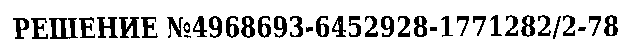


Время обработки:  2.6 сек
РЕШЕНИЕ Ng4968693-6452928-1771282/2-78
Точность определения текста: 72.28%

Результат определения:
4968693-6452928-1771282/2-78
Реальный номер:
4968693-6452928-1771282/2-78
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        big_2.jpg
Image shape: (177, 1872, 3)


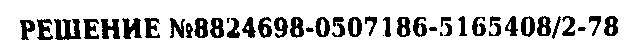


Время обработки:  2.6 сек
РЕШЕНИF N8824698-0507186-5165408/2-78
Точность определения текста: 73.92%

Результат определения:
8824698-0507186-5165408/2-78
Реальный номер:
8824698-0507186-5165408/2-78
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        big_3.jpg
Image shape: (169, 1936, 3)


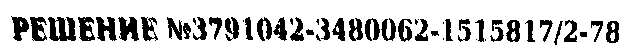


Время обработки:  2.6 сек
PrmkHnt W70402 7480062-1515817/2-78
Точность определения текста: 17.20%

Номер не определён!
--------------------------------------------------------------------------------
File:        big_4.jpg
Image shape: (88, 1080, 3)


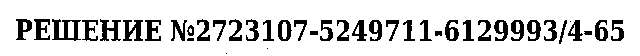


Время обработки:  4.0 сек
РЕШЕНИЕ Ng2723107-5249711-6129993/4-65
Точность определения текста: 81.38%

Результат определения:
2723107-5249711-6129993/4-65
Реальный номер:
2723107-5249711-6129993/4-65
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        big_5.jpg
Image shape: (73, 1086, 3)


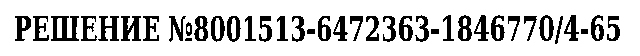


Время обработки:  2.6 сек
РЕШЕНИЕ 0 8001513-6472363-1846770/4-65
Точность определения текста: 73.69%

Результат определения:
8001513-6472363-1846770/4-65
Реальный номер:
8001513-6472363-1846770/4-65
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        big_6.jpg
Image shape: (70, 1084, 3)


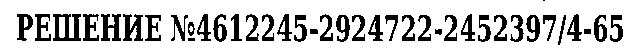


Время обработки:  2.5 сек
РЕШЕНИЕ 04612245-2924722-2452397/4-65
Точность определения текста: 76.07%

Результат определения:
4612245-2924722-2452397/4-65
Реальный номер:
4612245-2924722-2452397/4-65
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        big_7.jpg
Image shape: (31, 394, 3)


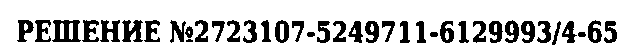


Время обработки:  2.5 сек
РЕШЕНИЕ N2723107-5249711-6129993/4-65
Точность определения текста: 98.70%

Результат определения:
2723107-5249711-6129993/4-65
Реальный номер:
2723107-5249711-6129993/4-65
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        big_8.jpg
Image shape: (31, 396, 3)


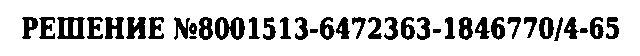


Время обработки:  2.8 сек
РЕШЕНИЕ N 8001513-6472363-1846770/4-65
Точность определения текста: 41.50%

Результат определения:
8001513-6472363-1846770/4-65
Реальный номер:
8001513-6472363-1846770/4-65
Верно/неверно определено:
True
--------------------------------------------------------------------------------

Определено правильно: 7/8 или 87.50%


In [50]:
file_list = sorted(glob('big*.jpg'))
print(file_list)
print()
j = 0
success = 0
for elem in file_list:
    img = cv2.imread(elem)
    print('File:       ', elem)
    print('Image shape:', img.shape)
    img1 = cv2.resize(img, (640, 56))
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    _, img2 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)    # с таким преобразованием определяет хуже
    cv2_imshow(img2)
    start_time = time.time()
    reader = easyocr.Reader(['en','ru']) # указываем и русский, и английский
    result = reader.readtext(img1) # allowlist='0123456789-/'
    print()
    print(f'Время обработки: {time.time() - start_time:4.1f} сек')
    print(result[0][1])
    print(f'Точность определения текста: {result[0][2]*100:.2f}%')
    print()
    res = re.search(r'\d{7}-\d{7}-\d{7}/[0-9-]+', result[0][1]) # regex: 7 цифр тире 7 цифр тире 7 цифр + косая черта + ещё какие-то цифры или тире
    if res:
        str1 = res.group(0)
        print('Результат определения:')
        print(str1)
        print('Реальный номер:')
        print(big_numbers[j])
        print('Верно/неверно определено:')
        print(big_numbers[j] == str1)
        if(big_numbers[j] == str1):
            success += 1
    else:
        print('Номер не определён!')
    j += 1
    print(80*'-')
print()
print(f'Определено правильно: {success}/{len(file_list)} или {success/len(file_list)*100:5.2f}%')

Маленькие номера

['small_1.jpg', 'small_2.jpg', 'small_3.jpg', 'small_4.jpg', 'small_5.jpg', 'small_6.jpg', 'small_7.jpg', 'small_8.jpg']



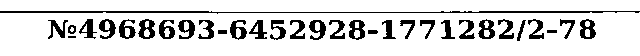

File:        small_1.jpg
Image shape: (128, 1105, 3)

Время обработки:  2.5 сек
Ng4968693-6452928-1771282/2-78
Точность определения текста: 88.18%

Результат определения:
4968693-6452928-1771282/2-78
Реальный номер:
4968693-6452928-1771282/2-78
Результат определения:
True
--------------------------------------------------------------------------------


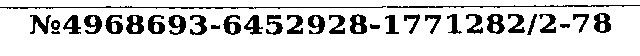

File:        small_2.jpg
Image shape: (124, 996, 3)

Время обработки:  2.5 сек
Ng4968693-6452928-1771282/2-78
Точность определения текста: 87.64%

Результат определения:
4968693-6452928-1771282/2-78
Реальный номер:
4968693-6452928-1771282/2-78
Результат определения:
True
--------------------------------------------------------------------------------


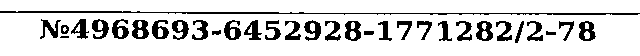

File:        small_3.jpg
Image shape: (125, 1059, 3)

Время обработки:  2.9 сек
Ng4968693-6452928-1771282/2-78
Точность определения текста: 95.88%

Результат определения:
4968693-6452928-1771282/2-78
Реальный номер:
4968693-6452928-1771282/2-78
Результат определения:
True
--------------------------------------------------------------------------------


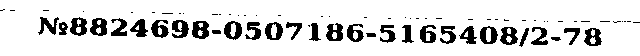

File:        small_4.jpg
Image shape: (147, 1090, 3)

Время обработки:  3.4 сек
Ne8824698-0507186-5165408/2-78
Точность определения текста: 77.63%

Результат определения:
8824698-0507186-5165408/2-78
Реальный номер:
8824698-0507186-5165408/2-78
Результат определения:
True
--------------------------------------------------------------------------------


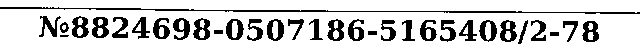

File:        small_5.jpg
Image shape: (113, 1037, 3)

Время обработки:  2.5 сек
Ng8824698-0507186-5165408/2-78
Точность определения текста: 82.90%

Результат определения:
8824698-0507186-5165408/2-78
Реальный номер:
8824698-0507186-5165408/2-78
Результат определения:
True
--------------------------------------------------------------------------------


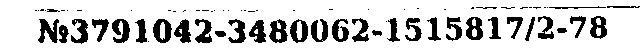

File:        small_6.jpg
Image shape: (109, 1064, 3)

Время обработки:  2.5 сек
N3791042-3480062-1515817/2-78
Точность определения текста: 92.48%

Результат определения:
3791042-3480062-1515817/2-78
Реальный номер:
3791042-3480062-1515817/2-78
Результат определения:
True
--------------------------------------------------------------------------------


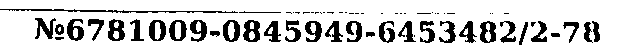

File:        small_7.jpg
Image shape: (117, 1056, 3)

Время обработки:  2.5 сек
Ng6781009-0845949-6453482/2-78
Точность определения текста: 93.92%

Результат определения:
6781009-0845949-6453482/2-78
Реальный номер:
6781009-0845949-6453482/2-78
Результат определения:
True
--------------------------------------------------------------------------------


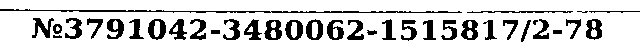

File:        small_8.jpg
Image shape: (124, 1049, 3)

Время обработки:  3.3 сек
Ng3791042-3480062-1515817/2-78
Точность определения текста: 87.64%

Результат определения:
3791042-3480062-1515817/2-78
Реальный номер:
3791042-3480062-1515817/2-78
Результат определения:
True
--------------------------------------------------------------------------------

Определено правильно: 8/8 или 100.00%


In [51]:
file_list = sorted(glob('small*.jpg'))
print(file_list)
print()
j = 0
success = 0
for elem in file_list:
    img = cv2.imread(elem)
    img1 = cv2.resize(img.copy(), (640, 56))
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    _, img2 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    cv2_imshow(img2)
    print('File:       ', elem)
    print('Image shape:', img.shape)
    start_time = time.time()
    reader = easyocr.Reader(['en','ru']) # указываем и русский, и английский
    result = reader.readtext(img1) # allowlist='0123456789-/'
    print()
    print(f'Время обработки: {time.time() - start_time:4.1f} сек')
    print(result[0][1])
    print(f'Точность определения текста: {result[0][2]*100:.2f}%')
    print()
    res = re.search(r'\d{7}-\d{7}-\d{7}/[0-9-]+', result[0][1]) # regex: 7 цифр тире 7 цифр тире 7 цифр + косая черта + ещё какие-то цифры или тире
    if res:
        str1 = res.group(0)
        print('Результат определения:')
        print(str1)
        print('Реальный номер:')
        print(small_numbers[j])
        print('Результат определения:')
        print(small_numbers[j] == str1)
        if(small_numbers[j] == str1):
            success += 1
    else:
        print('Номер не определён!')
    j += 1
    print(80*'-')
print()
print(f'Определено правильно: {success}/{len(file_list)} или {success/len(file_list)*100:5.2f}%')

### 2. Определение с tesseract

In [11]:
!pip install pytesseract
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'   # только для google.colab - путь к каталогу с tesseract
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

In [13]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 4s (1,266 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [16]:
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

In [22]:
img = cv2.imread('big_1.jpg')
str = pytesseract.image_to_string(img)
print(type(str))
print(str)

<class 'str'>
PEMIEHNME No4968693-6452928-1771282/2-78



In [24]:
res = re.search(r'\d{7}-\d{7}-\d{7}/[0-9-]+', str) # regex: 7 цифр тире 7 цифр тире 7 цифр + косая черта + ещё какие-то цифры или тире
if res:
    str1 = res.group(0)
    print('Результат определения:')
    print(str1)
    print('Реальный номер:')
    print(big_numbers[0])
    print('Результат определения:')
    print(big_numbers[0] == str1)
else:
    print('Номер не определён!')

Результат определения:
4968693-6452928-1771282/2-78
Реальный номер:
4968693-6452928-1771282/2-78
Результат определения:
True


Большие номера

['big_1.jpg', 'big_2.jpg', 'big_3.jpg', 'big_4.jpg', 'big_5.jpg', 'big_6.jpg', 'big_7.jpg', 'big_8.jpg']

File:        big_1.jpg
Image shape: (165, 1865, 3)


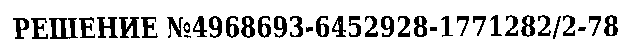


Время обработки:  0.3 сек
PEMMEHWE Ne4968693-6452928-1771282/2-78

Результат определения:
4968693-6452928-1771282/2-78
Реальный номер:
4968693-6452928-1771282/2-78
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        big_2.jpg
Image shape: (177, 1872, 3)


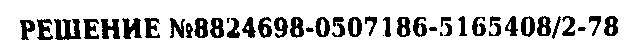


Время обработки:  0.3 сек
PEDIEHHE Ne8824698-0507 186-5 165408/2-78

Номер не определён!
--------------------------------------------------------------------------------
File:        big_3.jpg
Image shape: (169, 1936, 3)


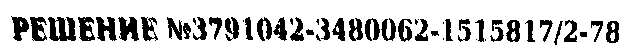


Время обработки:  0.3 сек
PEMENHHE Ns3791042-3480062-1515817/2-78

Результат определения:
3791042-3480062-1515817/2-78
Реальный номер:
3791042-3480062-1515817/2-78
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        big_4.jpg
Image shape: (88, 1080, 3)


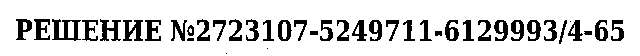


Время обработки:  0.3 сек
PEINEHHE Ne2723107-5249711-6129993/4-65

Результат определения:
2723107-5249711-6129993/4-65
Реальный номер:
2723107-5249711-6129993/4-65
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        big_5.jpg
Image shape: (73, 1086, 3)


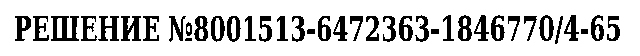


Время обработки:  0.2 сек
PEDIEHHE N28001513-6472363-1846770/4-65

Результат определения:
8001513-6472363-1846770/4-65
Реальный номер:
8001513-6472363-1846770/4-65
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        big_6.jpg
Image shape: (70, 1084, 3)


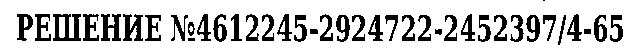


Время обработки:  0.2 сек
PEITEHME N24612245-2924722-2452397/4-65

Результат определения:
4612245-2924722-2452397/4-65
Реальный номер:
4612245-2924722-2452397/4-65
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        big_7.jpg
Image shape: (31, 394, 3)


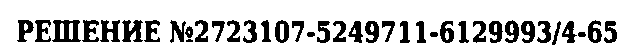


Время обработки:  0.2 сек
PEIMEHHE Ne2723107-5249711-6129993/4-65

Результат определения:
2723107-5249711-6129993/4-65
Реальный номер:
2723107-5249711-6129993/4-65
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        big_8.jpg
Image shape: (31, 396, 3)


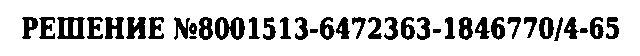


Время обработки:  0.3 сек
PEIIEHHE N:8001513-6472363-1846770/4-65

Результат определения:
8001513-6472363-1846770/4-65
Реальный номер:
8001513-6472363-1846770/4-65
Верно/неверно определено:
True
--------------------------------------------------------------------------------

Определено правильно: 7/8 или 87.50%


In [65]:
file_list = sorted(glob('big*.jpg'))
print(file_list)
print()
j = 0
success = 0
for elem in file_list:
    img = cv2.imread(elem)
    print('File:       ', elem)
    print('Image shape:', img.shape)
    img1 = cv2.resize(img.copy(), (640, 56))
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    _, img2 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    cv2_imshow(img2)
    start_time = time.time()
    result = pytesseract.image_to_string(img2)
    print()
    print(f'Время обработки: {time.time() - start_time:4.1f} сек')
    print(result)
    res = re.search(r'\d{7}-\d{7}-\d{7}/[0-9-]+', result) # regex: 7 цифр тире 7 цифр тире 7 цифр + косая черта + ещё какие-то цифры или тире
    if res:
        str1 = res.group(0)
        print('Результат определения:')
        print(str1)
        print('Реальный номер:')
        print(big_numbers[j])
        print('Верно/неверно определено:')
        print(big_numbers[j] == str1)
        if(big_numbers[j] == str1):
            success += 1
    else:
        print('Номер не определён!')
    j += 1
    print(80*'-')
print()
print(f'Определено правильно: {success}/{len(file_list)} или {success/len(file_list)*100:5.2f}%')

['small_1.jpg', 'small_2.jpg', 'small_3.jpg', 'small_4.jpg', 'small_5.jpg', 'small_6.jpg', 'small_7.jpg', 'small_8.jpg']

File:        small_1.jpg
Image shape: (128, 1105, 3)


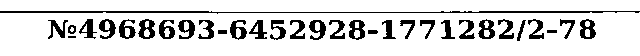


Время обработки:  0.5 сек
 

Ne4968693-6452928-1771282/2-78

Результат определения:
4968693-6452928-1771282/2-78
Реальный номер:
4968693-6452928-1771282/2-78
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        small_2.jpg
Image shape: (124, 996, 3)


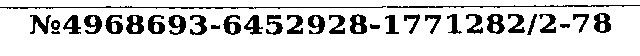


Время обработки:  0.5 сек
 

Ne4.968693-6452928-1771282/2-78

Номер не определён!
--------------------------------------------------------------------------------
File:        small_3.jpg
Image shape: (125, 1059, 3)


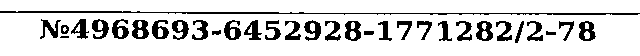


Время обработки:  0.4 сек
 

Ne4968693-6452928-1771282/2-78

Результат определения:
4968693-6452928-1771282/2-78
Реальный номер:
4968693-6452928-1771282/2-78
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        small_4.jpg
Image shape: (147, 1090, 3)


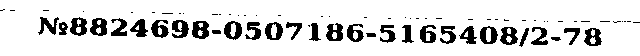


Время обработки:  0.5 сек
 N°8824698-0507186-5165408/2-78

Результат определения:
8824698-0507186-5165408/2-78
Реальный номер:
8824698-0507186-5165408/2-78
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        small_5.jpg
Image shape: (113, 1037, 3)


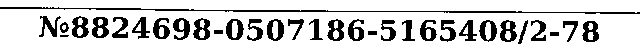


Время обработки:  0.4 сек
 

Ne8824698-0507186-5165408/2-78

Результат определения:
8824698-0507186-5165408/2-78
Реальный номер:
8824698-0507186-5165408/2-78
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        small_6.jpg
Image shape: (109, 1064, 3)


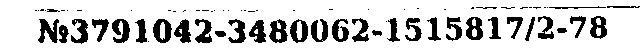


Время обработки:  0.5 сек
No3791042-3480062-1515817/2-78 —

Результат определения:
3791042-3480062-1515817/2-78
Реальный номер:
3791042-3480062-1515817/2-78
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        small_7.jpg
Image shape: (117, 1056, 3)


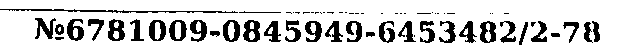


Время обработки:  0.3 сек
N26781009-0845949-6453482/2-78

Результат определения:
6781009-0845949-6453482/2-78
Реальный номер:
6781009-0845949-6453482/2-78
Верно/неверно определено:
True
--------------------------------------------------------------------------------
File:        small_8.jpg
Image shape: (124, 1049, 3)


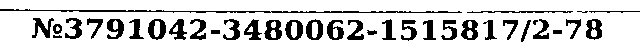


Время обработки:  0.3 сек
 

Ne3791042-3480062-1515817/2-78

Результат определения:
3791042-3480062-1515817/2-78
Реальный номер:
3791042-3480062-1515817/2-78
Верно/неверно определено:
True
--------------------------------------------------------------------------------

Определено правильно: 7/8 или 87.50%


In [67]:
file_list = sorted(glob('small*.jpg'))
print(file_list)
print()
j = 0
success = 0
for elem in file_list:
    img = cv2.imread(elem)
    print('File:       ', elem)
    print('Image shape:', img.shape)
    img1 = cv2.resize(img.copy(), (640, 56))
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    _, img2 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    cv2_imshow(img2)
    start_time = time.time()
    result = pytesseract.image_to_string(img1)
    print()
    print(f'Время обработки: {time.time() - start_time:4.1f} сек')
    print(result)
    res = re.search(r'\d{7}-\d{7}-\d{7}/[0-9-]+', result) # regex: 7 цифр тире 7 цифр тире 7 цифр + косая черта + ещё какие-то цифры или тире
    if res:
        str1 = res.group(0)
        print('Результат определения:')
        print(str1)
        print('Реальный номер:')
        print(small_numbers[j])
        print('Верно/неверно определено:')
        print(small_numbers[j] == str1)
        if(small_numbers[j] == str1):
            success += 1
    else:
        print('Номер не определён!')
    j += 1
    print(80*'-')
print()
print(f'Определено правильно: {success}/{len(file_list)} или {success/len(file_list)*100:5.2f}%')